<a href="https://colab.research.google.com/github/gomontalvo/UNIR-AA-Actividad3/blob/main/UNIR_AA_Act3_1032g.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#UNIR - MAESTRIA EN INTELIGENCIA ARTIFICIAL
#APRENDIZAJE AUTOMATICO
#DRA. MARIANA EDITH MIRANDA
#Realizado por:
# - Giovanny Omar Montalvo Riofrio
# - Humberto Villasenor Salazar
#Actividad 3


### IMPORTACION DE LIBRERIAS

In [26]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import math

###CARGAR GOOGLE DRIVE PARA LECTURA DE DATASET

In [27]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


###CARGAR DATASET

In [28]:
!ls "/content/drive/MyDrive/MisDataset"
#

ALLFLOWMETER_HIKARI2021.csv  bmd.csv  CTG.csv  malicious_phish.csv


In [29]:
# 2126 fetal cardiotocograms (CTGs) were automatically processed and the respective diagnostic features measured.
# The CTGs were also classified by three expert obstetricians and a consensus classification label assigned
# to each of them. Classification was both with respect to a morphologic pattern (A, B, C. …)
# and to a fetal state (N, S, P). Therefore the dataset can be used either for 10-class or 3-class experiments.
#
data = pd.read_csv('/content/drive/MyDrive/MisDataset/CTG.csv')
data

,FileName,Date,SegFile,b,e,LBE,LB,AC,FM,UC,...,C,D,E,AD,DE,LD,FS,SUSP,CLASS,NSP
0,Variab10.txt,12/1/1996,CTG0001.txt,240.0,357.0,120.0,120.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,9.0,2.0
1,Fmcs_1.txt,5/3/1996,CTG0002.txt,5.0,632.0,132.0,132.0,4.0,0.0,4.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
2,Fmcs_1.txt,5/3/1996,CTG0003.txt,177.0,779.0,133.0,133.0,2.0,0.0,5.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
3,Fmcs_1.txt,5/3/1996,CTG0004.txt,411.0,1192.0,134.0,134.0,2.0,0.0,6.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
4,Fmcs_1.txt,5/3/1996,CTG0005.txt,533.0,1147.0,132.0,132.0,4.0,0.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2124,S8001045.dsp,6/6/1998,CTG2127.txt,1576.0,3049.0,140.0,140.0,1.0,0.0,9.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0,2.0
2125,S8001045.dsp,6/6/1998,CTG2128.txt,2796.0,3415.0,142.0,142.0,1.0,1.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
2126,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2127,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
#Tamaño del dataset
data.shape

(2129, 40)

In [32]:
#Información de las variables
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2129 entries, 0 to 2128
Data columns (total 40 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   FileName  2126 non-null   object 
 1   Date      2126 non-null   object 
 2   SegFile   2126 non-null   object 
 3   b         2126 non-null   float64
 4   e         2126 non-null   float64
 5   LBE       2126 non-null   float64
 6   LB        2126 non-null   float64
 7   AC        2126 non-null   float64
 8   FM        2127 non-null   float64
 9   UC        2127 non-null   float64
 10  ASTV      2127 non-null   float64
 11  MSTV      2127 non-null   float64
 12  ALTV      2127 non-null   float64
 13  MLTV      2127 non-null   float64
 14  DL        2128 non-null   float64
 15  DS        2128 non-null   float64
 16  DP        2128 non-null   float64
 17  DR        2128 non-null   float64
 18  Width     2126 non-null   float64
 19  Min       2126 non-null   float64
 20  Max       2126 non-null   floa


**OBSERVACIONES:**

#### En primera instancia, las variables tipo objeto se descartan del analisis dado que son archivos de referencia que no cambian los datos descritos en cada ocurrencia.


| **Tipo** | **Nombres de columnas** |
|----------|-------------------------|
| *object* | Filename, Date, SegFile |
| *float64* | El resto*              |

In [7]:
data.head()

,FileName,Date,SegFile,b,e,LBE,LB,AC,FM,UC,...,C,D,E,AD,DE,LD,FS,SUSP,CLASS,NSP
0,Variab10.txt,12/1/1996,CTG0001.txt,240.0,357.0,120.0,120.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,9.0,2.0
1,Fmcs_1.txt,5/3/1996,CTG0002.txt,5.0,632.0,132.0,132.0,4.0,0.0,4.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
2,Fmcs_1.txt,5/3/1996,CTG0003.txt,177.0,779.0,133.0,133.0,2.0,0.0,5.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
3,Fmcs_1.txt,5/3/1996,CTG0004.txt,411.0,1192.0,134.0,134.0,2.0,0.0,6.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
4,Fmcs_1.txt,5/3/1996,CTG0005.txt,533.0,1147.0,132.0,132.0,4.0,0.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0


### ANALISIS DESCRIPTIVO DE DATOS

In [8]:
data1 = data.drop(columns=['FileName','Date', 'SegFile'])
data1.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
b,2126.0,878.439793,894.084748,0.0,55.0,538.0,1521.00,3296.0
e,2126.0,1702.877234,930.919143,287.0,1009.0,1241.0,2434.75,3599.0
LBE,2126.0,133.303857,9.840844,106.0,126.0,133.0,140.00,160.0
LB,2126.0,133.303857,9.840844,106.0,126.0,133.0,140.00,160.0
AC,2126.0,2.722484,3.560850,0.0,0.0,1.0,4.00,26.0
FM,2127.0,7.503056,39.030452,0.0,0.0,0.0,2.00,564.0
UC,2127.0,3.669017,2.877148,0.0,1.0,3.0,5.00,23.0
ASTV,2127.0,47.008933,17.210648,12.0,32.0,49.0,61.00,87.0
MSTV,2127.0,1.335449,0.891543,0.2,0.7,1.2,1.70,7.0
ALTV,2127.0,9.884814,18.476534,0.0,0.0,0.0,11.00,91.0


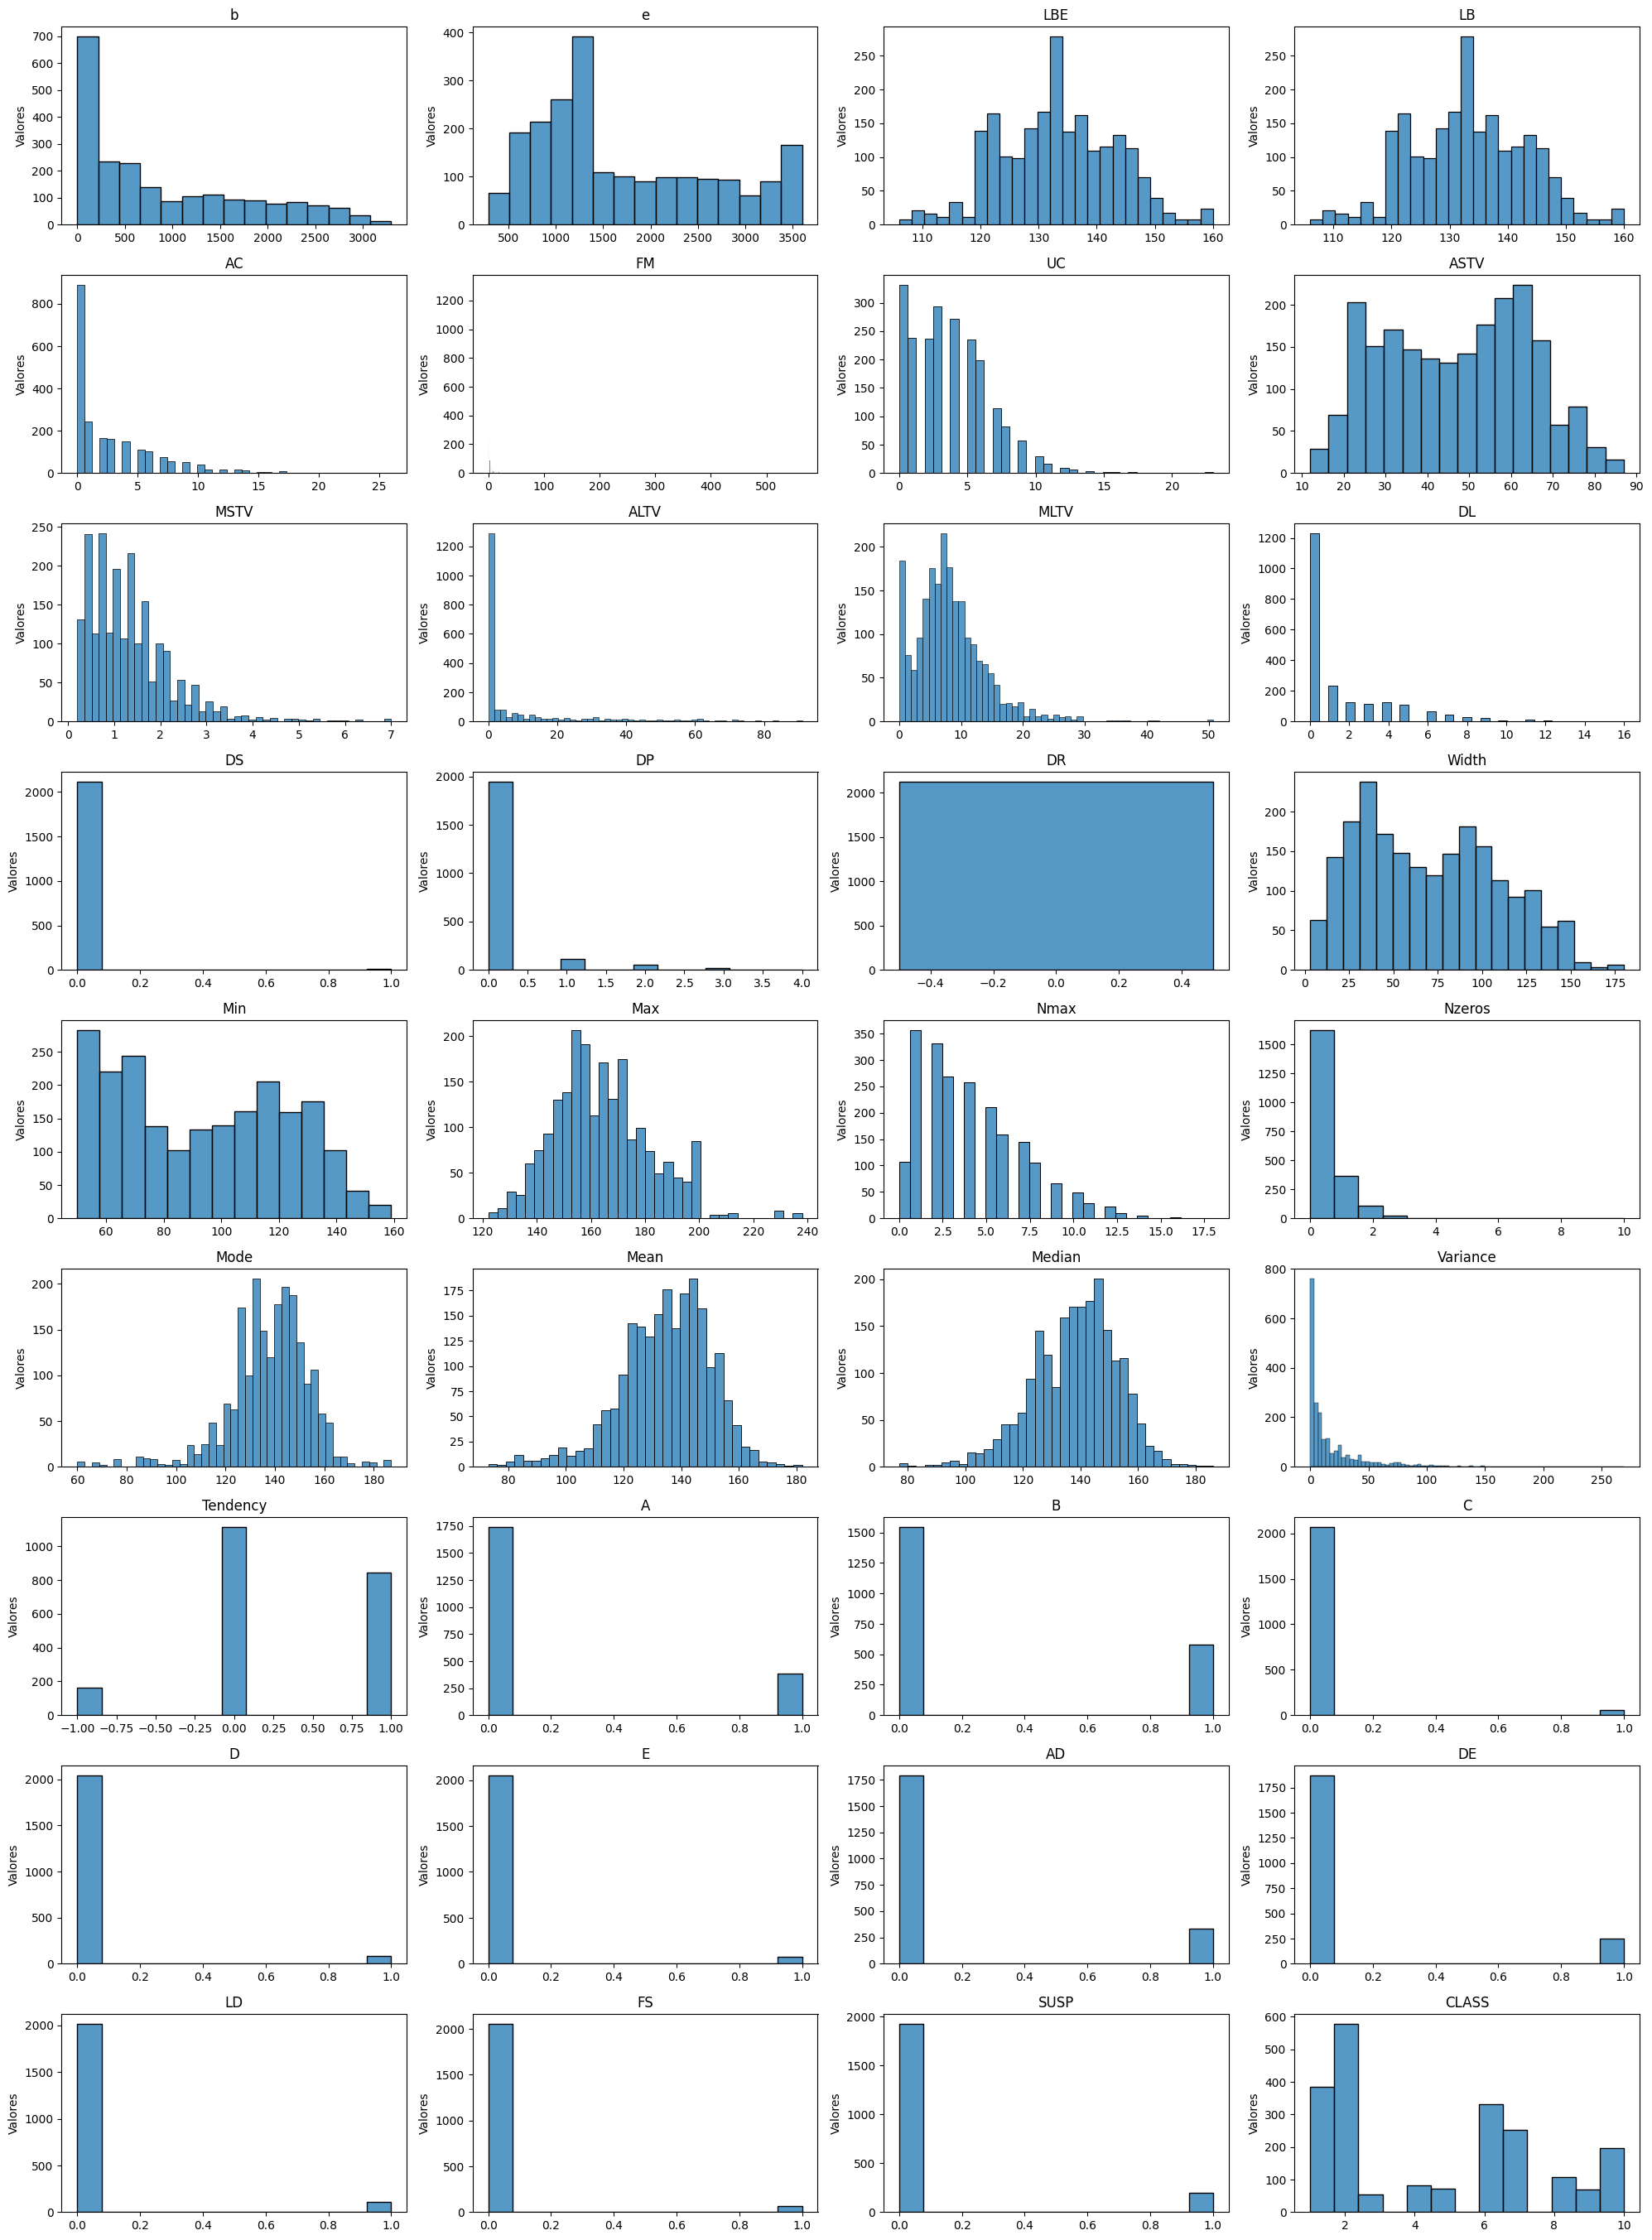

In [34]:
lst_contvar_out = data1.drop(columns='NSP')
#lst_contvar_out.remove('NSP')

ncols = 4
nrows = math.ceil(len(lst_contvar_out) / ncols)

fig, ax = plt.subplots(nrows, ncols, figsize=(5 * ncols, 3 * nrows))
ax = ax.flatten()  # para iterar fácilmente, sin usar [j][i]

for i, col_ in enumerate(lst_contvar_out):
    sns.histplot(data1[col_], ax=ax[i])
    ax[i].set_title(col_)
    ax[i].set_xlabel("")
    ax[i].set_ylabel("Valores")

# Eliminar los ejes vacíos si los hay
for j in range(i + 1, len(ax)):
    fig.delaxes(ax[j])

plt.tight_layout()
plt.show()

Se puede observar que los tipos de variables que existen en el *dataframe* aunque sean discretos (float), algunos toman valores de (0,1),(-1,0,1), (0,1,2) o (0,1,2,3) y podrian considerarse como categoricas:

| **Tipo**     | **Nombres de columnas**                                   |
|--------------|-----------------------------------------------------------|
| *Categorica* | DS, DP, Tendency, A, B, C, D, E, AD, DE, LD, FS, SUSP,    |
| *Discreta*   | b,e,LBE, LB, AC,FM,UC, ASTV, MSTV, ALTV, MLTV, DL, DR, With, Min,Max, Nmax, Nzeros, Mode, Mean, Median, Variance, CLASS              |


In [ ]:
lst_var_categoricas
lst_var_discretas

### Verificamos correlacion

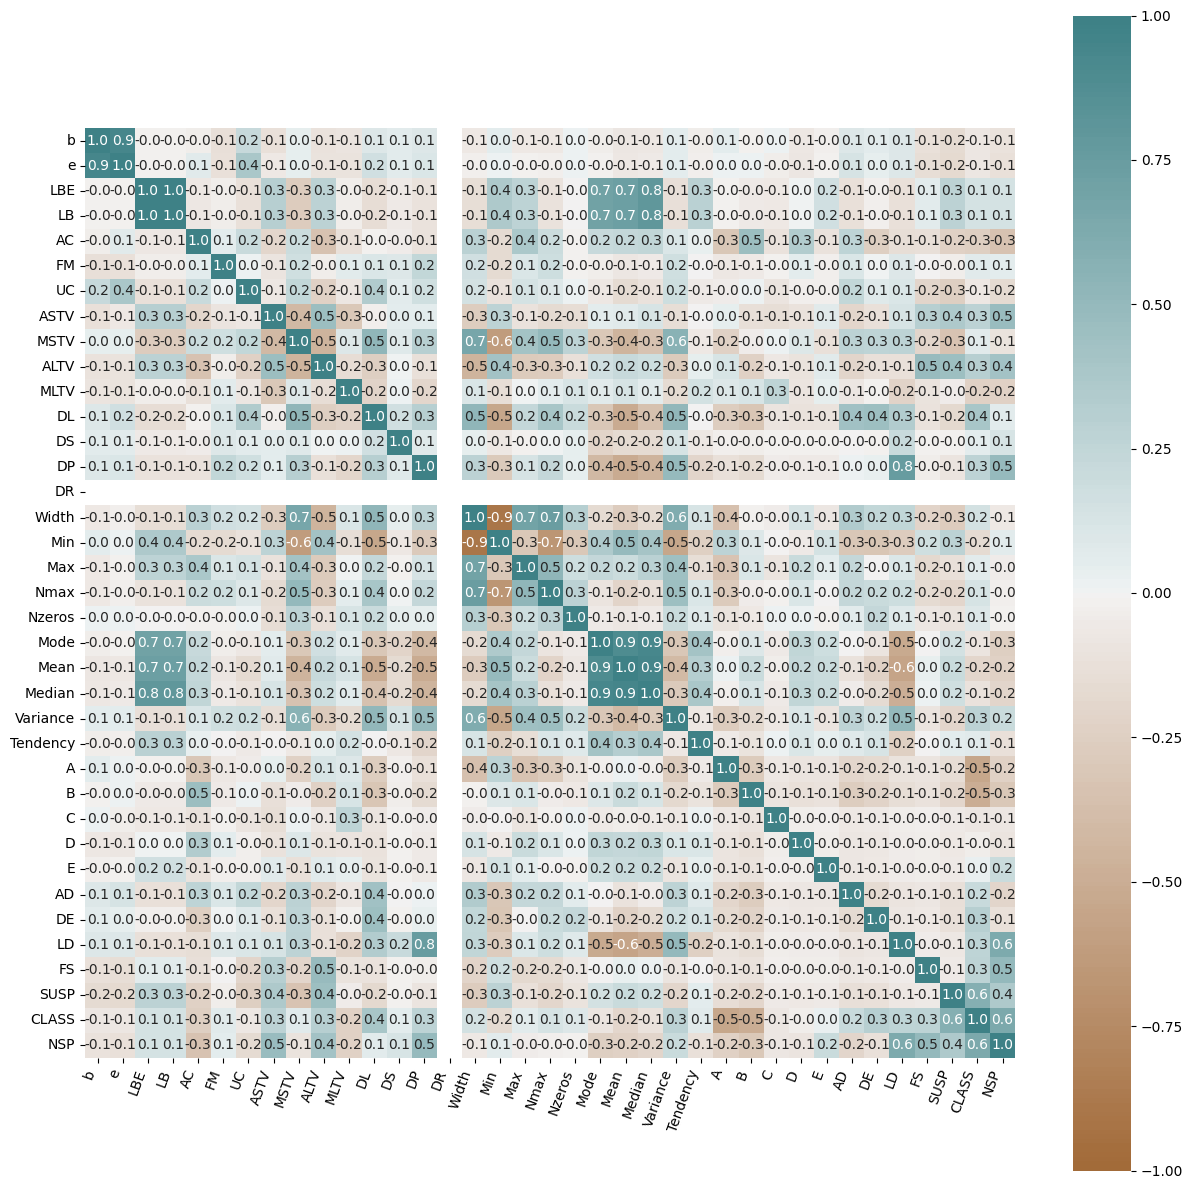

In [44]:
df_clean = data1.copy()

corr= df_clean.corr()
plt.figure(figsize=(15,15))
ax = sns.heatmap(
    corr,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(40, 200, n=200),
    square=True,
    annot = True, fmt=".1f"
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=70,
    horizontalalignment='right'
);

In [48]:
data1['FM'].sample(20)

,FM
1662,0.0
2075,1.0
687,104.0
1520,0.0
1760,0.0
822,0.0
1380,0.0
1219,0.0
708,0.0
551,0.0


In [49]:
data1['DR'].sample(20)

,DR
1968,0.0
2081,0.0
2084,0.0
687,0.0
2092,0.0
1514,0.0
1978,0.0
1412,0.0
90,0.0
2051,0.0


**OBSERVACIONES:**
Se verifica que
* En el caso de b y e, tienen una alta correlacion entre ellos
* Dado que FM,DS,DR no tienen mucha correlacion con NSP y muy pocos datos distintos de 0, se eliminara del dataframe a analizar

In [50]:
data_clean = data1.drop(columns=['FM','DR','DS'])

#### ANALISIS DE VALORES NULOS

In [53]:
# Verificacion de valores nulos
count_null = data_clean.isnull().sum()
cols_null = count_null[count_null > 0]
#cols_null = (cols_null / data1.shape[0]) * 100
display(cols_null)

,0
b,3
e,3
LBE,3
LB,3
AC,3
UC,2
ASTV,2
MSTV,2
ALTV,2
MLTV,2


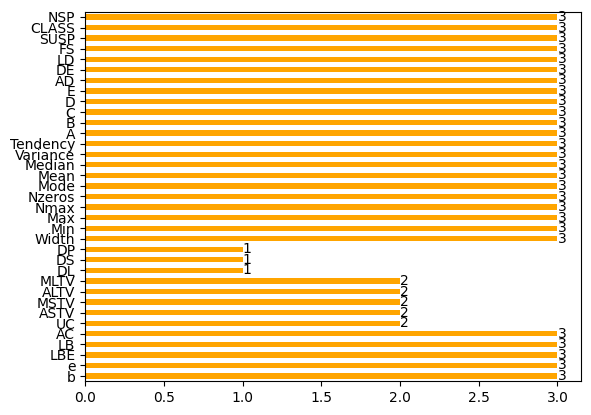

In [52]:
ax = cols_null.plot.barh(color='orange', rot=0)
ax = ax.bar_label(ax.containers[0])

Se verifican y se puede aplicar de acuerdo a su distribucion el reemplazo de valores nulos:

PROMEDIO: LBE, LB, DS, DP, Width, Min, Max

MEDIANA: b,e, AC, UC, ALTV, MLTV, DL, Nzeros, Median, Variance, Tendency, A, B, C, D, E,AD,DE,LD,FS,SUSP,CLASS

MODA: ASTV, MSTV, Mode

In [59]:
data1_clean = data_clean.dropna()
data1_clean.shape

data1_clean.head()

,b,e,LBE,LB,AC,UC,ASTV,MSTV,ALTV,MLTV,...,C,D,E,AD,DE,LD,FS,SUSP,CLASS,NSP
0,240.0,357.0,120.0,120.0,0.0,0.0,73.0,0.5,43.0,2.4,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,9.0,2.0
1,5.0,632.0,132.0,132.0,4.0,4.0,17.0,2.1,0.0,10.4,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
2,177.0,779.0,133.0,133.0,2.0,5.0,16.0,2.1,0.0,13.4,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
3,411.0,1192.0,134.0,134.0,2.0,6.0,16.0,2.4,0.0,23.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
4,533.0,1147.0,132.0,132.0,4.0,5.0,16.0,2.4,0.0,19.9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0


In [61]:
count_null = data1_clean.isnull().sum()
cols_null = count_null[count_null > 0]
#cols_null = (cols_null / data1.shape[0]) * 100
display(cols_null)

,0


**OBSERVACIONES: **
Se eliminaron datos NAN del dataframe y queda listo para aplicar en adelante los modelos: **data1_clean**

In [62]:
data1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2126 entries, 0 to 2125
Data columns (total 35 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   b         2126 non-null   float64
 1   e         2126 non-null   float64
 2   LBE       2126 non-null   float64
 3   LB        2126 non-null   float64
 4   AC        2126 non-null   float64
 5   UC        2126 non-null   float64
 6   ASTV      2126 non-null   float64
 7   MSTV      2126 non-null   float64
 8   ALTV      2126 non-null   float64
 9   MLTV      2126 non-null   float64
 10  DL        2126 non-null   float64
 11  DS        2126 non-null   float64
 12  DP        2126 non-null   float64
 13  Width     2126 non-null   float64
 14  Min       2126 non-null   float64
 15  Max       2126 non-null   float64
 16  Nmax      2126 non-null   float64
 17  Nzeros    2126 non-null   float64
 18  Mode      2126 non-null   float64
 19  Mean      2126 non-null   float64
 20  Median    2126 non-null   float64
 